In [26]:
# Python 3.5.4 |Continuum Analytics, Inc.|
# Jupyter Notebook 5.0.0

# SAMPLE CODE FOR MAKING NON-CONVERGENCE OF TITANIC DATA
# BASED ON RASCHKA (2015)

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np

import seaborn as sns  # Not used but habit


In [22]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [19]:
df = pd.read_csv('data/titanic-train.csv', header=0)
df.tail()

,PassengerId,Survived,Pclass,Sex,Scode,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,876,1,3,female,1,15.0,0,0,2667,7.2250,NaN,C
887,880,1,1,female,1,56.0,0,1,11767,83.1583,C50,C
888,881,1,2,female,1,25.0,0,1,230433,26.0000,NaN,S
889,888,1,1,female,1,19.0,0,0,112053,30.0000,B42,S
890,890,1,1,male,0,26.0,0,0,111369,30.0000,C148,C


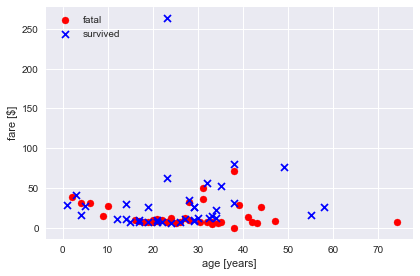

In [21]:
# select small sample of passengers
y = df.iloc[500:600, 1].values
# y = np.where(y == 'Iris-setosa', -1, 1)

# EXTRACT SEX AND PCLASS
X = df.iloc[500:600, [5, 9]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='fatal')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='survived')

plt.xlabel('age [years]')
plt.ylabel('fare [$]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('./images/02_06.png', dpi=300)
plt.show()

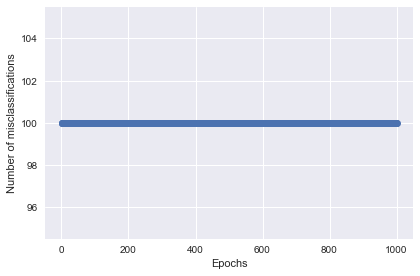

In [24]:
ppn = Perceptron(eta=0.1, n_iter=1000)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()